<a href="https://colab.research.google.com/github/ManojRam7/TelecomCustomerChurn_Prediction/blob/main/Customer_Churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/telco-customer-churn


In [ ]:
# prompt: help me load the above dataset

import os
import pandas as pd

# Assuming the dataset is a CSV file within the downloaded directory
# You might need to adjust the filename based on the actual dataset structure
file_path = os.path.join(path, 'WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first 5 rows of the DataFrame to verify loading
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape


Missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Data types of columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null 

<ipython-input-3-501557507>:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


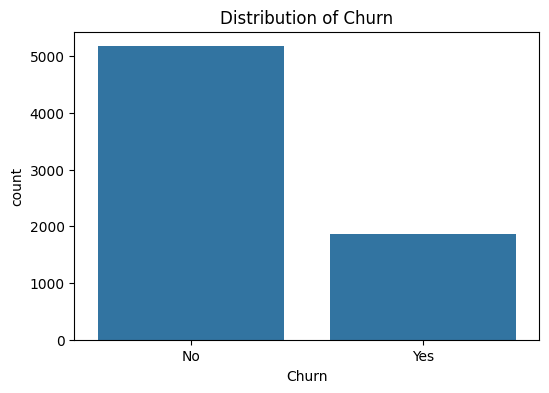

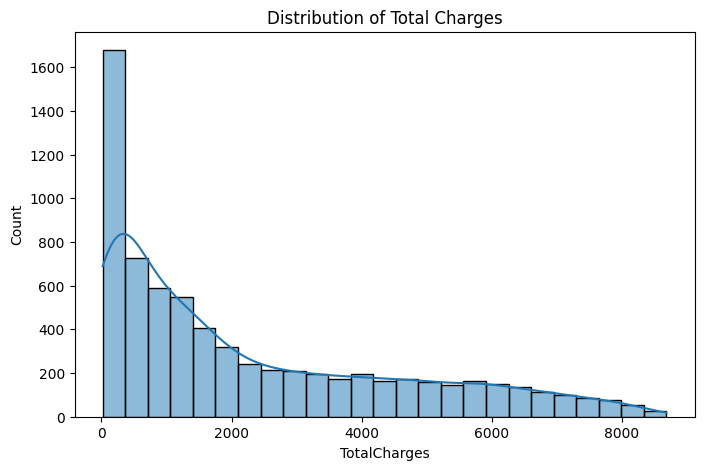

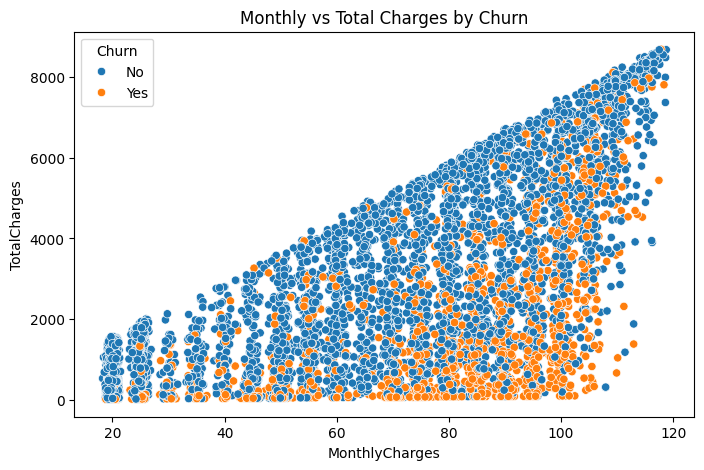


Churn rate by Gender:
gender  Churn
Female  No       0.730791
        Yes      0.269209
Male    No       0.738397
        Yes      0.261603
Name: proportion, dtype: float64

Churn rate by Internet Service:
InternetService  Churn
DSL              No       0.810409
                 Yes      0.189591
Fiber optic      No       0.581072
                 Yes      0.418928
No               No       0.925950
                 Yes      0.074050
Name: proportion, dtype: float64


In [ ]:
# prompt: help me to clean and analyse the above data set

import pandas as pd
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Check data types of columns
print("\nData types of columns:")
print(df.info())

# Basic statistical summary
print("\nStatistical summary of numerical columns:")
print(df.describe())

# Value counts for categorical columns (example for 'Churn' column)
print("\nValue counts for 'Churn':")
print(df['Churn'].value_counts())

# Handle potential 'No internet service' and 'No phone service' values in relevant columns
# Replace 'No internet service' with a more consistent value or handle as missing
# For example, replace with a placeholder like 'No Service' or NaN if appropriate for analysis
# Let's inspect columns potentially affected: MultipleLines, OnlineSecurity, OnlineBackup,
# DeviceProtection, TechSupport, StreamingTV, StreamingMovies
internet_service_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                         'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in internet_service_cols:
    if col in df.columns:
        print(f"\nValue counts for '{col}':")
        print(df[col].value_counts())
        # Example: replace 'No internet service' with 'No Service'
        # df[col] = df[col].replace('No internet service', 'No Service')
        # Alternatively, inspect and decide how to handle these values based on analysis goals

# Handle 'TotalCharges' which is object type and contains spaces
# Convert 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for missing values after conversion
print("\nMissing values after converting 'TotalCharges':")
print(df.isnull().sum())

# Handle missing 'TotalCharges' values (e.g., fill with median, mean, or drop rows)
# For demonstration, let's fill with the median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

print("\nMissing values after filling 'TotalCharges':")
print(df.isnull().sum())

# Further cleaning and analysis steps depend on specific goals:
# - One-hot encoding for categorical features
# - Scaling numerical features
# - Handling outliers
# - Exploratory Data Analysis (EDA) - visualizations
# - Feature engineering
# - Model building and evaluation (if the goal is prediction)

# Example: Basic visualization of 'Churn' distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()

# Example: Distribution of 'TotalCharges'
plt.figure(figsize=(8, 5))
sns.histplot(df['TotalCharges'], kde=True)
plt.title('Distribution of Total Charges')
plt.show()

# Example: Relationship between 'MonthlyCharges' and 'TotalCharges'
plt.figure(figsize=(8, 5))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=df)
plt.title('Monthly vs Total Charges by Churn')
plt.show()

# Example: churn rate by gender
print("\nChurn rate by Gender:")
print(df.groupby('gender')['Churn'].value_counts(normalize=True))

# Example: churn rate by 'InternetService'
print("\nChurn rate by Internet Service:")
print(df.groupby('InternetService')['Churn'].value_counts(normalize=True))

In [ ]:
# Step 1: Feature Engineering and Data Preprocessing

# Create new features (examples)
# Example: Tenure in years (assuming 'tenure' is in months)
df['tenure_years'] = df['tenure'] / 12

# Example: Create a 'has_internet' feature
df['has_internet'] = df['InternetService'].apply(lambda x: 0 if x in ['No', 'No internet service'] else 1)

# Handle categorical variables - One-Hot Encoding
# Identify categorical columns (excluding the target variable 'Churn' and potentially 'customerID')
categorical_cols = [col for col in df.columns if df[col].dtype == 'object' and col not in ['Churn', 'customerID']]

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Convert 'Churn' to numerical (0 for 'No', 1 for 'Yes')
df_encoded['Churn'] = df_encoded['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Separate features (X) and target (y)
X = df_encoded.drop(['Churn', 'customerID'], axis=1) # Drop 'customerID' as it's not a feature
y = df_encoded['Churn']

# Scale numerical features
from sklearn.preprocessing import StandardScaler

# Identify numerical columns (excluding the target and one-hot encoded columns)
# A robust way is to find numerical columns in the original df before encoding,
# then select them from the encoded df, or identify columns that are not uint8 (from get_dummies)
numerical_cols_before_encoding = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols_after_encoding = [col for col in X.columns if col in numerical_cols_before_encoding]

scaler = StandardScaler()
X[numerical_cols_after_encoding] = scaler.fit_transform(X[numerical_cols_after_encoding])

print("\nPrepared data for modeling:")
print(X.head())
print("\nTarget variable:")
print(y.head())


Prepared data for modeling:
   SeniorCitizen    tenure  MonthlyCharges  TotalCharges  tenure_years  \
0      -0.439916 -1.277445       -1.160323     -0.994242     -1.277445   
1      -0.439916  0.066327       -0.259629     -0.173244      0.066327   
2      -0.439916 -1.236724       -0.362660     -0.959674     -1.236724   
3      -0.439916  0.514251       -0.746535     -0.194766      0.514251   
4      -0.439916 -1.236724        0.197365     -0.940470     -1.236724   

   has_internet  gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0      0.525927        False         True           False             False   
1      0.525927         True        False           False              True   
2      0.525927         True        False           False              True   
3      0.525927         True        False           False             False   
4      0.525927        False        False           False              True   

   ...  StreamingTV_No internet service  StreamingT

In [ ]:
# Step 2: Split Data into Training and Testing Sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Using stratify to maintain churn distribution

print("\nTraining set shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("\nTesting set shapes:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


Training set shapes:
X_train: (5634, 32)
y_train: (5634,)

Testing set shapes:
X_test: (1409, 32)
y_test: (1409,)


In [ ]:
# Step 3: Choose and Train a Model

from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

print("\nModel training complete.")


Model training complete.


In [ ]:
# Step 4: Evaluate the Model

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f"\nModel Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(confusion)


Model Accuracy: 0.8055

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409


Confusion Matrix:
[[926 109]
 [165 209]]


In [ ]:
# Step 5: Hyperparameter Tuning (Example using GridSearchCV)

from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameters to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Initialize GridSearchCV
# We'll use 'accuracy' as the scoring metric, but you might consider 'roc_auc' for imbalanced datasets
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("\nBest parameters found by GridSearchCV:")
print(grid_search.best_params_)
print("\nBest cross-validation accuracy:")
print(grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best = best_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
report_best = classification_report(y_test, y_pred_best)
confusion_best = confusion_matrix(y_test, y_pred_best)

print(f"\nBest Model Test Accuracy: {accuracy_best:.4f}")
print("\nBest Model Classification Report:")
print(report_best)
print("\nBest Model Confusion Matrix:")
print(confusion_best)


Best parameters found by GridSearchCV:
{'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}

Best cross-validation accuracy:
0.8047544448314502

Best Model Test Accuracy: 0.8006

Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409


Best Model Confusion Matrix:
[[923 112]
 [169 205]]


In [ ]:
# Step 6: Cross-Validation (Example with the best model)

from sklearn.model_selection import cross_val_score

# Perform cross-validation with the best model
# We'll use 5 folds
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')

print("\nCross-validation accuracies:")
print(cv_scores)
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f}")


Cross-validation accuracies:
[0.80269695 0.81263307 0.78850248 0.81178977 0.80397727]
Mean cross-validation accuracy: 0.8039


In [ ]:
# Step 7: Trying Another Model (Example with RandomForestClassifier)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

print("\nRandomForest model training complete.")

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the RandomForest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
confusion_rf = confusion_matrix(y_test, y_pred_rf)

print(f"\nRandomForest Model Accuracy: {accuracy_rf:.4f}")
print("\nRandomForest Classification Report:")
print(report_rf)
print("\nRandomForest Confusion Matrix:")
print(confusion_rf)


RandomForest model training complete.

RandomForest Model Accuracy: 0.7949

RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1035
           1       0.65      0.51      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.78      0.79      0.79      1409


RandomForest Confusion Matrix:
[[931 104]
 [185 189]]



Feature Importances from RandomForest Model:
                           feature  importance
3                     TotalCharges    0.160152
2                   MonthlyCharges    0.150644
4                     tenure_years    0.127319
1                           tenure    0.120098
12     InternetService_Fiber optic    0.043432
30  PaymentMethod_Electronic check    0.035438
6                      gender_Male    0.026697
27               Contract_Two year    0.025986
28            PaperlessBilling_Yes    0.024577
15              OnlineSecurity_Yes    0.022995


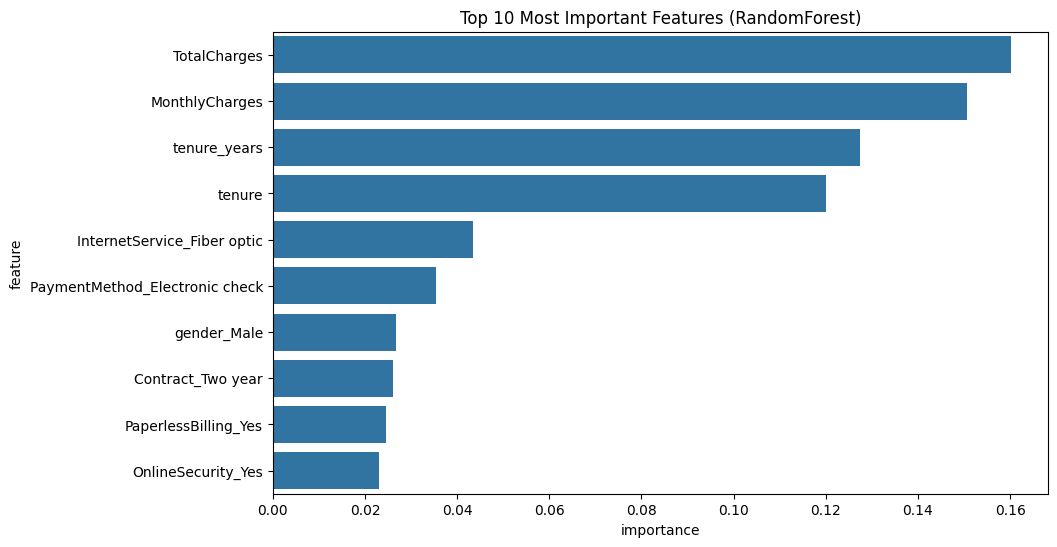

In [ ]:
# Step 8: Feature Importance (for Tree-based models like RandomForest)

# Check if the RandomForest model was trained
if 'rf_model' in locals() and isinstance(rf_model, RandomForestClassifier):
    print("\nFeature Importances from RandomForest Model:")
    importances = rf_model.feature_importances_
    feature_names = X.columns
    feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
    feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

    print(feature_importance_df.head(10)) # Print top 10 features

    # Optional: Visualize feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance_df.head(10))
    plt.title('Top 10 Most Important Features (RandomForest)')
    plt.show()
else:
    print("\nRandomForest model not trained or not available for feature importance analysis.")

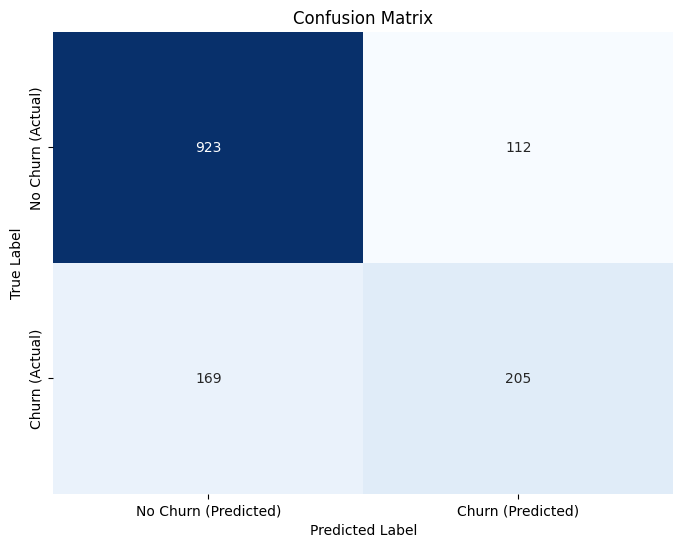

In [ ]:
# Step 9: Analyzing Model Predictions (Example with Confusion Matrix Visualization)

# Assuming you have evaluated a model (e.g., best_model or rf_model)
# Let's use the best_model for demonstration
if 'best_model' in locals():
    y_pred_viz = best_model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred_viz)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Churn (Predicted)', 'Churn (Predicted)'],
                yticklabels=['No Churn (Actual)', 'Churn (Actual)'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
else:
    print("\nNo model available for confusion matrix visualization.")

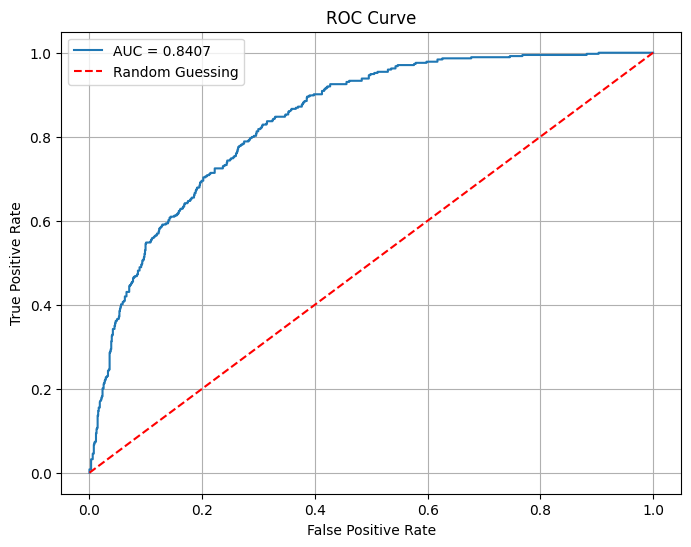


AUC for the best model: 0.8407


In [ ]:
# Step 10: Further Model Evaluation (ROC Curve and AUC)

from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have evaluated a model (e.g., best_model or rf_model)
# Let's use the best_model for demonstration
if 'best_model' in locals():
    y_pred_proba = best_model.predict_proba(X_test)[:, 1] # Get probabilities of the positive class (churn=1)

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"\nAUC for the best model: {roc_auc:.4f}")
else:
    print("\nNo model available for ROC curve and AUC calculation.")

In [ ]:
# Step 11: Addressing Class Imbalance (Example using SMOTE)

# This step should ideally be done before splitting data for training
# and evaluation to avoid data leakage.
# However, for demonstration purposes, we'll show how to use SMOTE on the training data.

from imblearn.over_sampling import SMOTE

# Assuming you have your training data X_train and y_train
if 'X_train' in locals() and 'y_train' in locals():
    print("\nClass distribution before SMOTE:")
    print(y_train.value_counts())

    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    print("\nClass distribution after SMOTE:")
    print(y_train_resampled.value_counts())

    # You would then train your model on X_train_resampled and y_train_resampled
    # For example:
    # model_smote = LogisticRegression(random_state=42)
    # model_smote.fit(X_train_resampled, y_train_resampled)
    # Evaluate model_smote on the original X_test and y_test
else:
    print("\nTraining data not available for SMOTE.")


Class distribution before SMOTE:
Churn
0    4139
1    1495
Name: count, dtype: int64

Class distribution after SMOTE:
Churn
0    4139
1    4139
Name: count, dtype: int64


In [ ]:
# Step 12: Making Predictions on New Data (Example)

# Assume you have a new data point with original features
# Replace this with your actual new data
new_customer_original_data = pd.DataFrame({
    'customerID': ['8888-AAAAA'], # Include customerID if present in original data
    'gender': ['Male'],
    'SeniorCitizen': [0],
    'Partner': ['Yes'],
    'Dependents': ['No'],
    'tenure': [12],
    'PhoneService': ['Yes'],
    'MultipleLines': ['Yes'],
    'InternetService': ['Fiber optic'],
    'OnlineSecurity': ['No'],
    'OnlineBackup': ['Yes'],
    'DeviceProtection': ['No'],
    'TechSupport': ['Yes'],
    'StreamingTV': ['No'],
    'StreamingMovies': ['No'],
    'Contract': ['Month-to-month'], # Use a contract type that exists in your training data
    'PaperlessBilling': ['Yes'],
    'PaymentMethod': ['Electronic check'],
    'MonthlyCharges': [70.0],
    'TotalCharges': [840.0]
})

# Apply the same preprocessing steps as used for the training data

# Handle 'TotalCharges' which is object type and contains spaces
# Convert 'TotalCharges' to numeric, coercing errors to NaN
new_customer_original_data['TotalCharges'] = pd.to_numeric(new_customer_original_data['TotalCharges'], errors='coerce')

# Handle missing 'TotalCharges' values (e.g., fill with the median used in training)
# Make sure to use the median calculated from the training data
if 'df' in locals() and 'TotalCharges' in df.columns:
    median_total_charges = df['TotalCharges'].median()
    new_customer_original_data['TotalCharges'].fillna(median_total_charges, inplace=True)
else:
    print("\nCould not find original DataFrame or TotalCharges column to get median for filling missing values.")
    # You might need to manually define a median or handle this case

# Create new features (examples)
# Example: Tenure in years (assuming 'tenure' is in months)
new_customer_original_data['tenure_years'] = new_customer_original_data['tenure'] / 12

# Example: Create a 'has_internet' feature
new_customer_original_data['has_internet'] = new_customer_original_data['InternetService'].apply(lambda x: 0 if x in ['No', 'No internet service'] else 1)

# Handle categorical variables - One-Hot Encoding
# Identify categorical columns (excluding 'customerID')
categorical_cols_new = [col for col in new_customer_original_data.columns if new_customer_original_data[col].dtype == 'object' and col != 'customerID']

# Apply one-hot encoding, ensuring all possible categories from training are considered
# This is a bit tricky. A robust way is to use the columns from the training data after encoding
# and ensure the new data has columns for all of them, filling with 0 if the category isn't present.

# Get the columns from the training data after encoding
training_cols = X.columns

# Apply one-hot encoding to the new data
new_customer_encoded = pd.get_dummies(new_customer_original_data, columns=categorical_cols_new, drop_first=True)

# Reindex the new data to match the training columns, filling missing columns with 0
new_customer_processed = new_customer_encoded.reindex(columns=training_cols, fill_value=0)

# Apply the same scaling to numerical features in the new data
if 'scaler' in locals():
    numerical_cols_after_encoding_new = [col for col in new_customer_processed.columns if col in numerical_cols_before_encoding]
    # Ensure numerical_cols_before_encoding is still available or redefine it
    # It should contain the numerical columns from the original df before one-hot encoding
    if 'numerical_cols_before_encoding' in locals():
         new_customer_processed[numerical_cols_after_encoding_new] = scaler.transform(new_customer_processed[numerical_cols_after_encoding_new])
    else:
        print("\n'numerical_cols_before_encoding' not available. Cannot scale new data correctly.")
        # You might need to re-run the preprocessing steps from the beginning or save this list

else:
    print("\nScaler not available. Cannot scale new data.")


# Make a prediction using the best model
if 'best_model' in locals():
    # Ensure the new_customer_processed DataFrame has the same columns and order as X_train/X
    if list(new_customer_processed.columns) == list(X.columns):
        prediction = best_model.predict(new_customer_processed)
        prediction_proba = best_model.predict_proba(new_customer_processed)[:, 1]

        print("\nPrediction for the new customer:")
        if prediction[0] == 1:
            print("The customer is likely to churn.")
        else:
            print("The customer is not likely to churn.")

        print(f"Churn probability: {prediction_proba[0]:.4f}")
    else:
        print("\nColumns of new processed data do not match training data columns. Cannot make prediction.")
        print("New data columns:", list(new_customer_processed.columns))
        print("Training data columns:", list(X.columns))

else:
    print("\nNo trained model available to make predictions.")


Prediction for the new customer:
The customer is not likely to churn.
Churn probability: 0.0868


<ipython-input-17-1333181144>:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_customer_original_data['TotalCharges'].fillna(median_total_charges, inplace=True)


In [ ]:
# Step 13: Model Saving and Loading

import joblib
import os

# Define a path to save the model
model_save_path = 'best_churn_model.pkl' # You can choose a different filename

# Save the best model
if 'best_model' in locals():
    joblib.dump(best_model, model_save_path)
    print(f"\nBest model saved to: {model_save_path}")
else:
    print("\nNo best model available to save.")

# To load the model later in another session or script
# loaded_model = joblib.load(model_save_path)
# print("\nModel loaded successfully.")

# You would also need to save the scaler and any other preprocessing objects
# scaler_save_path = 'scaler.pkl'
# joblib.dump(scaler, scaler_save_path)
# print(f"Scaler saved to: {scaler_save_path}")

# To load the scaler:
# loaded_scaler = joblib.load(scaler_save_path)


Best model saved to: best_churn_model.pkl


In [ ]:
# Step 14: Creating a Prediction Function

def predict_churn(new_data_original, model, scaler, original_df_for_median, original_X_cols, original_numerical_cols):
    """
    Predicts churn for new customer data.

    Args:
        new_data_original (pd.DataFrame): DataFrame with new customer data
                                           in the original feature format.
        model: Trained machine learning model.
        scaler: Fitted StandardScaler object used for training data.
        original_df_for_median (pd.DataFrame): Original DataFrame used to calculate median
                                               for 'TotalCharges'.
        original_X_cols (list): List of column names of the training data (X).
        original_numerical_cols (list): List of numerical column names from the original df
                                         before encoding.

    Returns:
        tuple: (prediction, prediction_probability)
    """
    # Make a copy to avoid modifying the original input DataFrame
    new_data_processed = new_data_original.copy()

    # Apply the same preprocessing steps as training data

    # Handle 'TotalCharges'
    if 'TotalCharges' in new_data_processed.columns:
        new_data_processed['TotalCharges'] = pd.to_numeric(new_data_processed['TotalCharges'], errors='coerce')
        if original_df_for_median is not None and 'TotalCharges' in original_df_for_median.columns:
             median_total_charges = original_df_for_median['TotalCharges'].median()
             new_data_processed['TotalCharges'].fillna(median_total_charges, inplace=True)
        else:
             print("Warning: Could not find original DataFrame or TotalCharges for median imputation.")
    else:
        print("Warning: 'TotalCharges' column not found in new data.")


    # Create new features
    if 'tenure' in new_data_processed.columns:
        new_data_processed['tenure_years'] = new_data_processed['tenure'] / 12
    if 'InternetService' in new_data_processed.columns:
        new_data_processed['has_internet'] = new_data_processed['InternetService'].apply(lambda x: 0 if x in ['No', 'No internet service'] else 1)


    # Handle categorical variables - One-Hot Encoding
    categorical_cols_new = [col for col in new_data_processed.columns if new_data_processed[col].dtype == 'object' and col != 'customerID']
    new_data_encoded = pd.get_dummies(new_data_processed, columns=categorical_cols_new, drop_first=True)

    # Reindex to match training columns
    new_data_aligned = new_data_encoded.reindex(columns=original_X_cols, fill_value=0)


    # Apply scaling
    if scaler is not None and original_numerical_cols is not None:
         numerical_cols_after_encoding_new = [col for col in new_data_aligned.columns if col in original_numerical_cols]
         if numerical_cols_after_encoding_new: # Check if there are numerical columns to scale
            new_data_aligned[numerical_cols_after_encoding_new] = scaler.transform(new_data_aligned[numerical_cols_after_encoding_new])
         else:
            print("Warning: No numerical columns found in new data to scale.")
    else:
        print("Warning: Scaler or original numerical columns not available for scaling.")


    # Ensure column order and names match before prediction
    if list(new_data_aligned.columns) == list(original_X_cols):
        # Make prediction
        prediction = model.predict(new_data_aligned)
        prediction_proba = model.predict_proba(new_data_aligned)[:, 1]

        return prediction[0], prediction_proba[0]
    else:
        print("\nError: Columns of new processed data do not match training data columns. Cannot make prediction.")
        print("New data columns:", list(new_data_aligned.columns))
        print("Training data columns:", list(original_X_cols))
        return None, None


# Example usage of the prediction function:
# Assuming 'best_model', 'scaler', 'df', 'X.columns', and 'numerical_cols_before_encoding' are available from previous steps

# Create new customer data in original format
new_customer_example = pd.DataFrame({
    'customerID': ['9999-BBBBB'],
    'gender': ['Female'],
    'SeniorCitizen': [1],
    'Partner': ['No'],
    'Dependents': ['No'],
    'tenure': [1],
    'PhoneService': ['Yes'],
    'MultipleLines': ['No'],
    'InternetService': ['DSL'],
    'OnlineSecurity': ['No'],
    'OnlineBackup': ['No'],
    'DeviceProtection': ['No'],
    'TechSupport': ['No'],
    'StreamingTV': ['No'],
    'StreamingMovies': ['No'],
    'Contract': ['Month-to-month'],
    'PaperlessBilling': ['Yes'],
    'PaymentMethod': ['Mailed check'],
    'MonthlyCharges': [45.0],
    'TotalCharges': [45.0] # Example with a numerical TotalCharges
})

# Or example with a string TotalCharges to test the conversion
# new_customer_example = pd.DataFrame({ ... 'TotalCharges': ['45.0'] ... })

# Make prediction using the function
if 'best_model' in locals() and 'scaler' in locals() and 'df' in locals() and 'X' in locals() and 'numerical_cols_before_encoding' in locals():
    churn_prediction, churn_probability = predict_churn(
        new_customer_example,
        best_model,
        scaler,
        df, # Pass the original df for median imputation
        X.columns, # Pass the columns of the training data X
        numerical_cols_before_encoding # Pass the list of original numerical columns
    )

    if churn_prediction is not None:
        print("\nPrediction using the function:")
        if churn_prediction == 1:
            print("The customer is likely to churn.")
        else:
            print("The customer is not likely to churn.")
        print(f"Churn probability: {churn_probability:.4f}")
else:
    print("\nRequired variables (best_model, scaler, df, X, numerical_cols_before_encoding) not available for prediction function example.")


Logistic Regression Model Coefficients:
                                  feature  coefficient
12            InternetService_Fiber optic     2.811264
25                    StreamingMovies_Yes     1.025908
23                        StreamingTV_Yes     1.023713
11                      MultipleLines_Yes     0.687285
3                            TotalCharges     0.565155
30         PaymentMethod_Electronic check     0.383966
28                   PaperlessBilling_Yes     0.368803
19                   DeviceProtection_Yes     0.359238
17                       OnlineBackup_Yes     0.220158
31             PaymentMethod_Mailed check     0.074898
0                           SeniorCitizen     0.053743
21                        TechSupport_Yes     0.028737
6                             gender_Male     0.024152
7                             Partner_Yes     0.020982
15                     OnlineSecurity_Yes    -0.024290
29  PaymentMethod_Credit card (automatic)    -0.027622
5                       

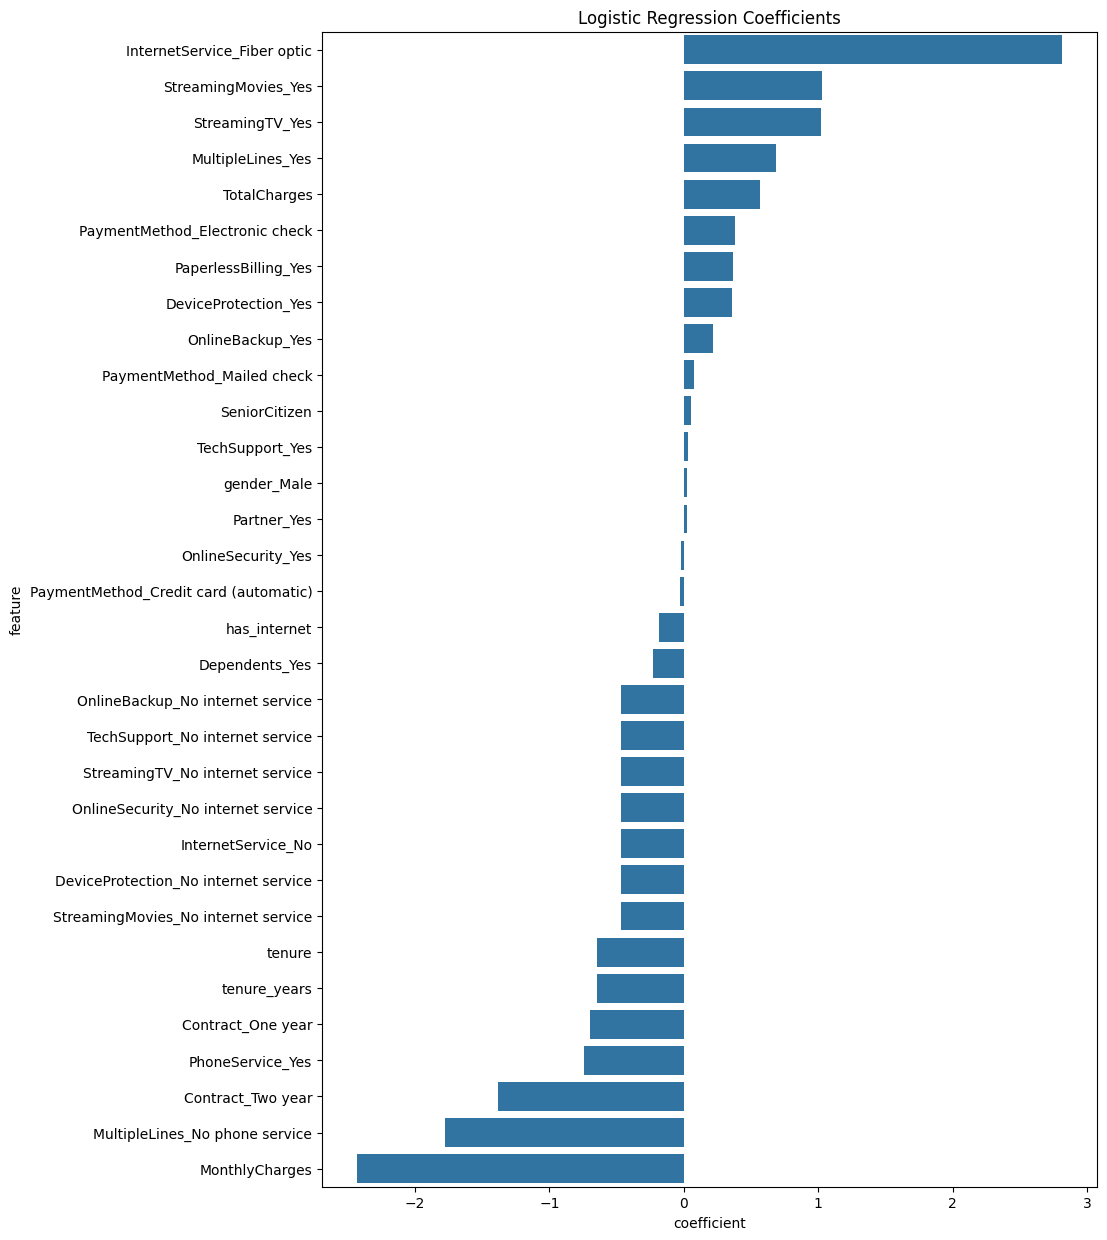

In [ ]:
# Step 15: Model Interpretation (Example with Logistic Regression Coefficients)

if 'best_model' in locals() and isinstance(best_model, LogisticRegression):
    print("\nLogistic Regression Model Coefficients:")
    coefficients = best_model.coef_[0]
    feature_names = X.columns
    coeff_df = pd.DataFrame({'feature': feature_names, 'coefficient': coefficients})
    coeff_df = coeff_df.sort_values('coefficient', ascending=False)

    print(coeff_df)

    # Optional: Visualize coefficients
    plt.figure(figsize=(10, 15)) # Adjust figure size as needed
    sns.barplot(x='coefficient', y='feature', data=coeff_df)
    plt.title('Logistic Regression Coefficients')
    plt.show()

else:
    print("\nBest model is not a Logistic Regression model or not available for coefficient analysis.")

In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.3 MB/s eta 0:00:00


In [ ]:
# app.py

import streamlit as st
import pandas as pd
import joblib
import os
from sklearn.preprocessing import StandardScaler

# Load the trained model, scaler, and other necessary objects
# Make sure these paths are correct based on where you save your files
try:
    best_model = joblib.load('best_churn_model.pkl')
    # Assuming you saved the scaler as well
    # scaler = joblib.load('scaler.pkl')
    # You might need to load other objects here if your predict_churn function requires them
    # For example, if you saved the list of original numerical columns
    # original_numerical_cols = joblib.load('original_numerical_cols.pkl')
    # If your median imputation relies on the original df, you might need to handle that differently in deployment
    # Perhaps save the median value itself: median_total_charges = joblib.load('median_total_charges.pkl')

    # For demonstration, let's assume the scaler is available and we saved the original X columns and numerical columns
    # In a real deployment, you would save these explicitly
    # If running this after the previous steps in the same Colab session, these might be available
    if 'scaler' in locals() and 'X' in locals() and 'numerical_cols_before_encoding' in locals():
         print("Loaded scaler, X columns, and numerical columns from current session.")
         scaler_loaded = scaler # Use the scaler from the current session
         original_X_cols_loaded = X.columns # Use columns from the current session's X
         original_numerical_cols_loaded = numerical_cols_before_encoding # Use the list from the current session
         # Assuming you also need the median TotalCharges if there were missing values in the original data
         # You should have calculated and saved this median during your training pipeline
         # For this example, let's assume you have a variable `median_total_charges` from your training
         if 'df' in locals() and 'TotalCharges' in df.columns:
             median_total_charges_loaded = df['TotalCharges'].median()
         else:
              median_total_charges_loaded = None # Handle case where median is not available
              st.warning("Median TotalCharges not available. Missing TotalCharges will not be imputed.")

    else:
        st.error("Required preprocessing objects (scaler, original X columns, original numerical columns) not found. Please ensure they are saved and loaded correctly.")
        st.stop() # Stop the app if essential objects are missing

except FileNotFoundError:
    st.error("Model file or other required files not found. Please ensure 'best_churn_model.pkl' and other necessary files are in the correct directory.")
    st.stop() # Stop the app if the model file is not found

# Define the prediction function (similar to Step 14 in your notebook)
def predict_churn(new_data_original, model, scaler, median_total_charges, original_X_cols, original_numerical_cols):
    """
    Predicts churn for new customer data.

    Args:
        new_data_original (pd.DataFrame): DataFrame with new customer data
                                           in the original feature format.
        model: Trained machine learning model.
        scaler: Fitted StandardScaler object used for training data.
        median_total_charges (float): Median TotalCharges from the training data for imputation.
        original_X_cols (list): List of column names of the training data (X).
        original_numerical_cols (list): List of numerical column names from the original df
                                         before encoding.

    Returns:
        tuple: (prediction, prediction_probability) or (None, None) if error occurs.
    """
    # Make a copy to avoid modifying the original input DataFrame
    new_data_processed = new_data_original.copy()

    # Apply the same preprocessing steps as training data

    # Handle 'TotalCharges'
    if 'TotalCharges' in new_data_processed.columns:
        new_data_processed['TotalCharges'] = pd.to_numeric(new_data_processed['TotalCharges'], errors='coerce')
        if median_total_charges is not None:
             new_data_processed['TotalCharges'].fillna(median_total_charges, inplace=True)
        # Note: In a real deployment, you'd need a robust way to get the median if not saved.
    else:
        st.warning("Warning: 'TotalCharges' column not found in new data for prediction.")


    # Create new features
    if 'tenure' in new_data_processed.columns:
        new_data_processed['tenure_years'] = new_data_processed['tenure'] / 12
    if 'InternetService' in new_data_processed.columns:
        new_data_processed['has_internet'] = new_data_processed['InternetService'].apply(lambda x: 0 if x in ['No', 'No internet service'] else 1)


    # Handle categorical variables - One-Hot Encoding
    categorical_cols_new = [col for col in new_data_processed.columns if new_data_processed[col].dtype == 'object' and col != 'customerID']
    new_data_encoded = pd.get_dummies(new_data_processed, columns=categorical_cols_new, drop_first=True)

    # Reindex to match training columns
    new_data_aligned = new_data_encoded.reindex(columns=original_X_cols, fill_value=0)


    # Apply scaling
    if scaler is not None and original_numerical_cols is not None:
         numerical_cols_after_encoding_new = [col for col in new_data_aligned.columns if col in original_numerical_cols]
         if numerical_cols_after_encoding_new: # Check if there are numerical columns to scale
            try:
                new_data_aligned[numerical_cols_after_encoding_new] = scaler.transform(new_data_aligned[numerical_cols_after_encoding_new])
            except ValueError as e:
                 st.error(f"Error during scaling: {e}. This might be due to inconsistent data or missing numerical columns.")
                 return None, None
         else:
            st.warning("Warning: No numerical columns found in new data to scale during prediction.")
    else:
        st.warning("Warning: Scaler or original numerical columns not available for scaling during prediction.")


    # Ensure column order and names match before prediction
    if list(new_data_aligned.columns) == list(original_X_cols):
        # Make prediction
        prediction = model.predict(new_data_aligned)
        prediction_proba = model.predict_proba(new_data_aligned)[:, 1]

        return prediction[0], prediction_proba[0]
    else:
        st.error("Error: Columns of new processed data do not match training data columns. Cannot make prediction.")
        st.write("New data columns:", list(new_data_aligned.columns))
        st.write("Training data columns:", list(original_X_cols))
        return None, None

# --- Streamlit App Interface ---

st.title("Telco Customer Churn Prediction")

st.write("Enter customer details to predict if they will churn.")

# Input fields for customer data
# You'll need to create input widgets for each feature in your original dataset
# Here are some examples:

st.sidebar.header("Customer Information")

gender = st.sidebar.radio("Gender", ['Female', 'Male'])
senior_citizen = st.sidebar.selectbox("Senior Citizen", [0, 1], format_func=lambda x: 'Yes' if x == 1 else 'No')
partner = st.sidebar.radio("Partner", ['Yes', 'No'])
dependents = st.sidebar.radio("Dependents", ['Yes', 'No'])
tenure = st.sidebar.slider("Tenure (Months)", 0, 72, 1)
phone_service = st.sidebar.radio("Phone Service", ['Yes', 'No'])
multiple_lines = st.sidebar.selectbox("Multiple Lines", ['No phone service', 'No', 'Yes'])
internet_service = st.sidebar.selectbox("Internet Service", ['DSL', 'Fiber optic', 'No'])
online_security = st.sidebar.selectbox("Online Security", ['No internet service', 'No', 'Yes'])
online_backup = st.sidebar.selectbox("Online Backup", ['No internet service', 'No', 'Yes'])
device_protection = st.sidebar.selectbox("Device Protection", ['No internet service', 'No', 'Yes'])
tech_support = st.sidebar.selectbox("Tech Support", ['No internet service', 'No', 'Yes'])
streaming_tv = st.sidebar.selectbox("Streaming TV", ['No internet service', 'No', 'Yes'])
streaming_movies = st.sidebar.selectbox("Streaming Movies", ['No internet service', 'No', 'Yes'])
contract = st.sidebar.selectbox("Contract", ['Month-to-month', 'One year', 'Two year'])
paperless_billing = st.sidebar.radio("Paperless Billing", ['Yes', 'No'])
payment_method = st.sidebar.selectbox("Payment Method", ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'])
monthly_charges = st.sidebar.number_input("Monthly Charges", min_value=0.0, value=50.0)
total_charges = st.sidebar.number_input("Total Charges", min_value=0.0, value=1000.0)

# Create a DataFrame from the input values
# This DataFrame should have the same structure as your original input

2025-06-14 10:53:19.183 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 10:53:19.198 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 10:53:19.201 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 10:53:19.202 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 10:53:19.203 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 10:53:19.219 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 10:53:19.223 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 10:53:19.233 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

Loaded scaler, X columns, and numerical columns from current session.


2025-06-14 10:53:19.387 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 10:53:19.388 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 10:53:19.391 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 10:53:19.393 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 10:53:19.395 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 10:53:19.396 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 10:53:19.397 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 10:53:19.399 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [32]:
!streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py & npx localtunnel --port 8502

⠙⠹

⠸⠼⠴⠦⠧
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.247.123.103:8501

⠇your url is: https://twelve-chefs-know.loca.lt
  Stopping...
^C
